<a href="https://colab.research.google.com/github/sarimiro56/BigData_Python/blob/main/PBL%EA%B8%B0%EB%A7%90%EA%B3%A0%EC%82%AC%EC%9A%A9_%EA%B3%BC%EC%A0%9C_202116029_%ED%83%9C%EC%9D%80%EC%84%A0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import sys

!sudo add-apt-repository ppa:saiarcot895/chromium-beta #실행 결과에서 Enter 입력
!sudo apt remove chromium-browser
!sudo snap remove chromium
!sudo apt install chromium-browser

!pip3 install selenium
!apt-get update
!apt install chromium-chromedriver
!cp /usr/lib/chromium-browser/chromedriver /usr/bin

sys.path.insert(0,'/usr/lib/chromium-browser/chromedriver')

PPA publishes dbgsym, you may need to include 'main/debug' component
Repository: 'deb https://ppa.launchpadcontent.net/saiarcot895/chromium-beta/ubuntu/ jammy main'
Description:
This PPA contains the latest Chromium Beta builds, with hardware video decoding enabled (hidden behind a flag), and support for Widevine (needed for viewing many DRM-protected videos) enabled.

== Hardware Video Decoding ==

To enable hardware video decoding, start Chromium with the --enable-features=VaapiVideoDecoder argument. To make this persistent, create a file at /etc/chromium-browser/customizations/92-vaapi-hardware-decoding with the following contents:

CHROMIUM_FLAGS="${CHROMIUM_FLAGS} --enable-features=VaapiVideoDecoder"

See also https://wiki.archlinux.org/title/Chromium#Hardware_video_acceleration for more information on VAAPI video decoding support.

=== Widevine Support ===

The packages in this PPA have support for Widevine inside Chromium enabled. However, you still need to copy some files from 

In [3]:
import time
from selenium import webdriver
from selenium.webdriver.chrome.service import Service
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC

options = webdriver.ChromeOptions()
options.add_argument('--headless') #창이 나타나지 않도록 Headless 설정하기
options.add_argument('--no-sandbox')
options.add_argument('--disable-dev-shm-usage')

webdriver_service = Service(executable_path=r'/usr/bin/chromedriver')
driver = webdriver.Chrome(service = webdriver_service, options=options)
url = 'https://www.metacritic.com/browse/movie/netflix/'
driver.get(url)

In [4]:
columns = ['개봉일', '영화제목', '평점']
movie_day = []
title = []
ratings = []
for i in range(1, 10):
  movie_day.append(driver.find_element(By.CSS_SELECTOR, '#__layout > div > div.c-layoutDefault_page > div.c-trackScroll > main > section > div.c-productListings > div:nth-child(1) > div:nth-child('+ str(i) +') > a > div.c-finderProductCard_info.u-flexbox-column > div:nth-child(2) > span.u-text-uppercase').text)
  title.append(driver.find_element(By.CSS_SELECTOR, '#__layout > div > div.c-layoutDefault_page > div.c-trackScroll > main > section > div.c-productListings > div:nth-child(1) > div:nth-child('+ str(i) +') > a > div.c-finderProductCard_info.u-flexbox-column > div.c-finderProductCard_title > h3 > span:nth-child(2)').text)
  ratings.append(driver.find_element(By.CSS_SELECTOR, '#__layout > div > div.c-layoutDefault_page > div.c-trackScroll > main > section > div.c-productListings > div:nth-child(1) > div:nth-child('+ str(i) +') > a > div.c-finderProductCard_info.u-flexbox-column > div.c-finderProductCard_meta.g-outer-spacing-top-auto > span > div > div > span').text)

In [5]:
import pandas as pd
df = pd.DataFrame({columns[0]: movie_day,
                   columns[1]: title,
                   columns[2]: ratings}, columns = columns)
df.head(10)

,개봉일,영화제목,평점
0,"NOV 21, 2018",Roma,96
1,"DEC 9, 2016",La La Land,94
2,"NOV 20, 2015",Carol,94
3,"NOV 24, 2017",Call Me by Your Name,94
4,"NOV 1, 2019",The Irishman,94
5,"NOV 6, 2019",Marriage Story,94
6,"MAY 28, 1993",Sankofa,93
7,"APR 14, 1975",Monty Python and the Holy Grail,91
8,"OCT 9, 2020",Time,91


In [6]:
df.to_csv('MovieStar.csv', index = False)

In [7]:
url = 'https://www.metacritic.com/browse/movie/hulu/'
driver.get(url)

In [8]:
columns = ['개봉일', '영화제목', '평점']
movie_day = []
title = []
ratings = []
for i in range(1, 10):
  movie_day.append(driver.find_element(By.CSS_SELECTOR, '#__layout > div > div.c-layoutDefault_page > div.c-trackScroll > main > section > div.c-productListings > div:nth-child(1) > div:nth-child('+ str(i) +') > a > div.c-finderProductCard_info.u-flexbox-column > div:nth-child(2) > span.u-text-uppercase').text)
  title.append(driver.find_element(By.CSS_SELECTOR, '#__layout > div > div.c-layoutDefault_page > div.c-trackScroll > main > section > div.c-productListings > div:nth-child(1) > div:nth-child('+ str(i) +') > a > div.c-finderProductCard_info.u-flexbox-column > div.c-finderProductCard_title > h3 > span:nth-child(2)').text)
  ratings.append(driver.find_element(By.CSS_SELECTOR, '#__layout > div > div.c-layoutDefault_page > div.c-trackScroll > main > section > div.c-productListings > div:nth-child(1) > div:nth-child('+ str(i) +') > a > div.c-finderProductCard_info.u-flexbox-column > div.c-finderProductCard_meta.g-outer-spacing-top-auto > span > div > div > span').text)

In [9]:
import pandas as pd
df = pd.DataFrame({columns[0]: movie_day,
                   columns[1]: title,
                   columns[2]: ratings}, columns = columns)
df.head(10)

,개봉일,영화제목,평점
0,"MAR 5, 2021","Quo Vadis, Aida?",97
1,"JUL 2, 2021","Summer of Soul (...Or, When the Revolution Cou...",96
2,"DEC 6, 2019",Portrait of a Lady on Fire,95
3,"NOV 20, 2020",Collective,95
4,"DEC 3, 2021",Flee,91
5,"JUL 25, 2008",Man on Wire,89
6,"NOV 3, 2006",Borat: Cultural Learnings of America for Make ...,89
7,"JUN 22, 1979",Alien,89
8,"DEC 4, 2020",Nomadland,89


In [10]:
df.to_csv('MovieStar2.csv', index = False)

In [16]:
import pandas as pd
import matplotlib.pyplot as plt

# CSV 파일에서 데이터 로드
df1 = pd.read_csv('MovieStar.csv', encoding='utf-8')
df2 = pd.read_csv('MovieStar2.csv', encoding='utf-8')

# 두 데이터프레임 합치기
merged_df = pd.concat([df1, df2], keys=['Netflix', 'Hulu'])

# 데이터프레임의 처음 몇 행 표시
print(merged_df)

                    개봉일                                               영화제목  평점
Netflix 0  NOV 21, 2018                                               Roma  96
        1   DEC 9, 2016                                         La La Land  94
        2  NOV 20, 2015                                              Carol  94
        3  NOV 24, 2017                               Call Me by Your Name  94
        4   NOV 1, 2019                                       The Irishman  94
        5   NOV 6, 2019                                     Marriage Story  94
        6  MAY 28, 1993                                            Sankofa  93
        7  APR 14, 1975                    Monty Python and the Holy Grail  91
        8   OCT 9, 2020                                               Time  91
Hulu    0   MAR 5, 2021                                   Quo Vadis, Aida?  97
        1   JUL 2, 2021  Summer of Soul (...Or, When the Revolution Cou...  96
        2   DEC 6, 2019                         Port

In [12]:
average_ratings_by_platform = merged_df.groupby(merged_df.index.get_level_values(0))['평점'].mean()
print("\n각 플랫폼에서의 영화 평균 평점:\n", average_ratings_by_platform)


각 플랫폼에서의 영화 평균 평점:
 Hulu       92.222222
Netflix    93.444444
Name: 평점, dtype: float64


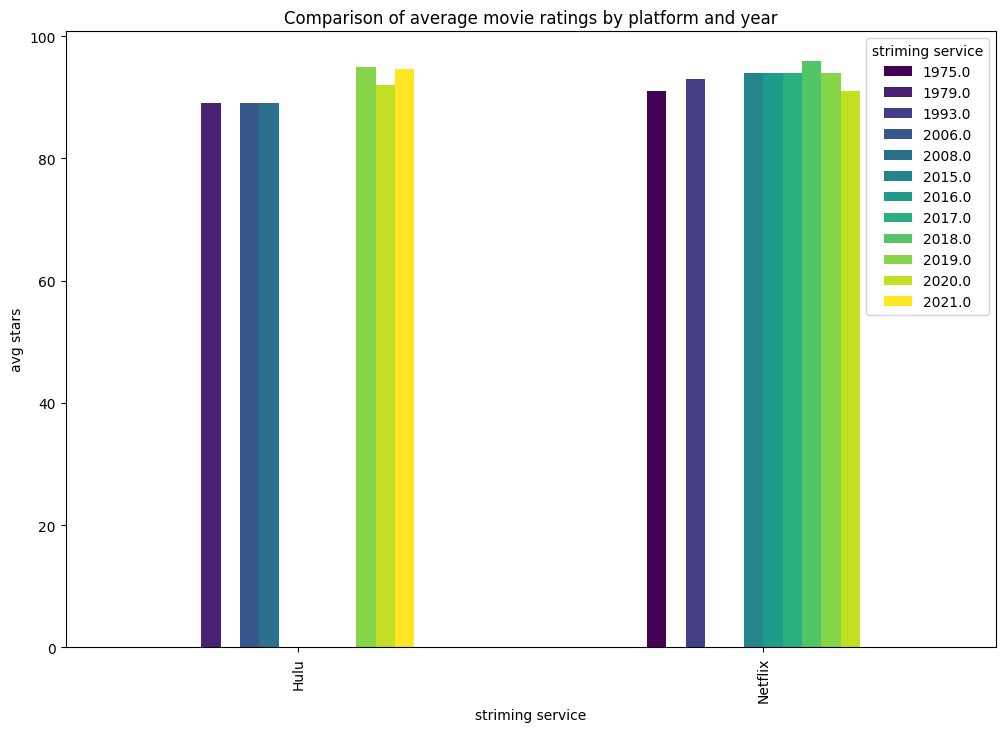

In [28]:
# '플랫폼' 정보를 인덱스로 추가
df1['플랫폼'] = 'Netflix'
df2['플랫폼'] = 'Hulu'

# 두 데이터프레임 합치기
merged_df = pd.concat([df1, df2])

# 연도 정보를 추출하여 새로운 열 추가
merged_df['개봉연도'] = merged_df['개봉일'].str.extract('(\d{4})').astype(float)

# 플랫폼 및 연도별 영화 평균 평점 계산
average_ratings_by_platform_and_year = merged_df.groupby(['플랫폼', '개봉연도'])['평점'].mean().unstack()

# 시각화
average_ratings_by_platform_and_year.plot(kind='bar', figsize=(12, 8), colormap='viridis')
plt.title('Comparison of average movie ratings by platform and year')
plt.xlabel('striming service')
plt.ylabel('avg stars')
plt.legend(title='striming service')
plt.show()
